**Introduction :**

Le problème du voyageur de commerce *(TSP)* est un problème d'optimisation combinatoire qui consiste à trouver le parcours le plus court à travers un ensemble de villes, en visitant chaque ville exactement une fois et en retournant à la ville de départ.

Il s'agit d'un problème NP-complet, ce qui signifie qu'il n'existe pas d'algorithme exact qui permette de résoudre le problème en temps polynomial pour des instances de grande taille.

L'algorithme de recuit simulé est une méthode d'optimisation heuristique qui peut être utilisée pour résoudre des problèmes d'optimisation combinatoire tels que le *TSP*. Il s'agit d'une méthode probabiliste qui explore l'espace des solutions en utilisant une fonction de coût et une fonction de refroidissement pour éviter de rester coincé dans les minima locaux.

Dans ce rapport, nous allons présenter une implémentation de l'algorithme de recuit simulé pour résoudre le problème du *TSP* en *Python*.

**Implémentation :**


Notre implémentation de l'algorithme de recuit simulé pour le TSP est basée sur la fonction `simulated_annealing` qui prend en entrée un dictionnaire de villes, où chaque ville est représentée par une clé unique et ses coordonnées sont stockées sous forme de valeurs de tuple, et renvoie la meilleure solution trouvée et sa distance totale.


In [18]:
import random
import math

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def distance(coords1, coords2):
    """Calculate the Euclidean distance between two cities."""
    return math.sqrt((coords1[0] - coords2[0])**2 + (coords1[1] - coords2[1])**2)

def total_distance(solution, city_coords):
    """Calculate the total distance of a given solution."""
    dist = 0
    for i in range(len(solution)-1):
        dist += distance(city_coords[solution[i]], city_coords[solution[i+1]])
    dist += distance(city_coords[solution[-1]], city_coords[solution[0]])
    return dist

def get_neighbor(solution):
    """Generate a neighboring solution by swapping two cities."""
    neighbor = solution.copy()
    index1 = random.randint(0, len(neighbor)-1)
    index2 = random.randint(0, len(neighbor)-1)
    neighbor[index1], neighbor[index2] = neighbor[index2], neighbor[index1]
    return neighbor

def simulated_annealing(city_coords, initial_temperature=1000, cooling_rate=0.95,
                        min_temperature=1, max_iterations=10000):
    """Use simulated annealing to solve the TSP."""
    # Create an initial solution by shuffling the city list
    current_solution = list(city_coords.keys())
    random.shuffle(current_solution)
    best_solution = current_solution
    best_distance = total_distance(best_solution, city_coords)
    
    # Set the initial temperature
    temperature = initial_temperature
    
    # Perform simulated annealing
    for i in range(max_iterations):
        # Generate a neighboring solution
        neighbor_solution = get_neighbor(current_solution)
        neighbor_distance = total_distance(neighbor_solution, city_coords)
        
        # Determine whether to accept the neighbor
        delta_distance = neighbor_distance - best_distance
        acceptance_probability = math.exp(-delta_distance / temperature)
        if delta_distance < 0 or random.random() < acceptance_probability:
            current_solution = neighbor_solution
            
            # Check if the new solution is better than the current best
            current_distance = total_distance(current_solution, city_coords)
            if current_distance < best_distance:
                best_solution = current_solution
                best_distance = current_distance
        
        # Lower the temperature
        temperature *= cooling_rate
        if temperature < min_temperature:
            break
            
    return best_solution, best_distance

a fonction simulated_annealing commence par définir quatre fonctions auxiliaires : distance, total_distance, get_neighbor et simulated_annealing. La fonction distance calcule la distance euclidienne entre deux villes à partir de leurs coordonnées. La fonction total_distance calcule la distance totale parcourue pour une solution donnée en additionnant les distances entre chaque ville dans l'ordre spécifié par la solution et en ajoutant la distance entre ladernière ville et la première ville. La fonction get_neighbor génère une solution voisine en échangeant deux villes de la solution actuelle. Enfin, la fonction simulated_annealing utilise ces fonctions auxiliaires pour implémenter l'algorithme de recuit simulé pour résoudre le TSP.
La fonction simulated_annealing prend en entrée le dictionnaire de villes city_coords, ainsi que plusieurs paramètres optionnels : initial_temperature, qui définit la température initiale de l'algorithme ; cooling_rate, qui définit le taux de refroidissement de l'algorithme ; min_temperature, qui définit la température minimale de l'algorithme ; et max_iterations, qui définit le nombre maximum d'itérations de l'algorithme.
La fonction commence par créer une solution initiale en mélangeant aléatoirement la liste des villes. Cette solution est stockée dans current_solution et considérée comme la meilleure solution actuelle (best_solution) avec sa distance totale correspondante (best_distance).
Ensuite, l'algorithme de recuit simulé est exécuté dans une boucle pour un nombre maximal d'itérations spécifié par max_iterations. À chaque itération, une solution voisine est générée à l'aide de la fonction get_neighbor. La distance totale de la solution voisine est calculée à l'aide de la fonction total_distance.
La fonction détermine ensuite si la solution voisine doit être acceptée ou non. Si la distance totale de la solution voisine est inférieure à la distance totale de la meilleure solution actuelle (best_distance), la solution voisine devient la nouvelle meilleure solution actuelle. Sinon, la solution voisine est acceptée avec une probabilité qui dépend de la différence entre la distance totale de la solution voisine et la distance totale de la meilleure solution actuelle, ainsi que de la température actuelle de l'algorithme.
À chaque itération, la température est abaissée en multipliant la température actuelle par le taux de refroidissement spécifié par cooling_rate. Si la température atteint la valeur minimale spécifiée par min_temperature, l'algorithme s'arrête.
Finalement, la fonction renvoie la meilleure solution trouvée (best_solution) et sa distance totale correspondante (best_distance).
Utilisation

In [19]:
def plot_solution(cities, solution):
    # Create a dictionary that maps each city to its coordinates
    city_coords = {city: coords for city, coords in cities.items()}

    # Set up the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title('Traveling Salesman Problem Solution', fontsize=16)
    ax.set_xlabel('X Coordinate', fontsize=12)
    ax.set_ylabel('Y Coordinate', fontsize=12)
    ax.grid(True)

    # Set up custom font properties for the legend
    font = FontProperties()
    font.set_family('serif')
    font.set_size('large')

    # Set up colors for the cities and the paths
    city_color = '#9b59b6'
    path_color = '#3498db'

    # Plot the cities
    for city, (x, y) in city_coords.items():
        ax.plot(x, y, 'o', color=city_color, markersize=8, label=city)

    # Connect the cities in the order specified by the solution
    for i in range(len(solution)-1):
        city1 = solution[i]
        city2 = solution[i+1]
        x1, y1 = city_coords[city1]
        x2, y2 = city_coords[city2]
        ax.plot([x1, x2], [y1, y2], '-', color=path_color, lw=2)

    # Connect the last and first cities
    city1 = solution[0]
    city2 = solution[-1]
    x1, y1 = city_coords[city1]
    x2, y2 = city_coords[city2]
    ax.plot([x1, x2], [y1, y2], '-', color=path_color, lw=2)

    # Add a legend
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, prop=font)

    # Show the plot
    plt.tight_layout()
    plt.show()


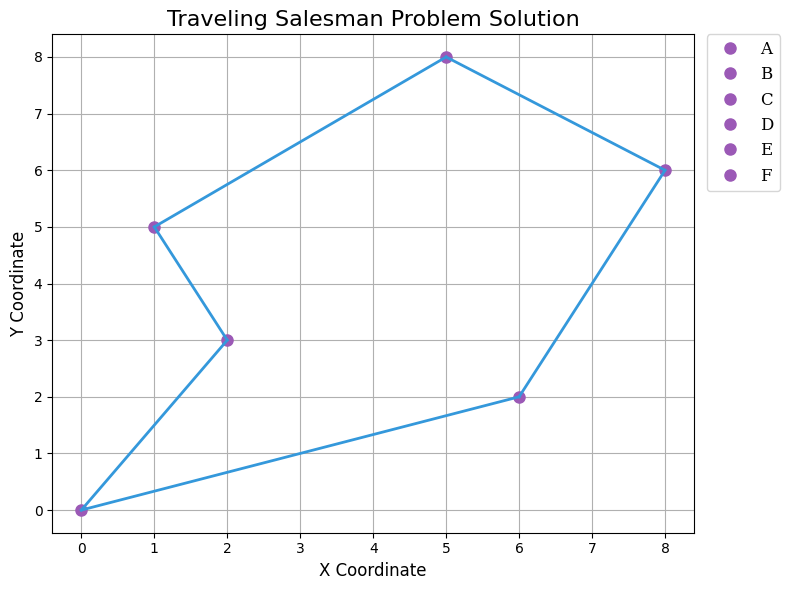

In [23]:
# Plot the solution
# Liste des villes et leurs coordonnées 
villes = { "A": (0, 0),  
           "B": (1, 5),
           "C": (2, 3),
           "D": (5, 8),
           "E": (6, 2),
           "F": (8, 6) 
} 

meilleure_solution, meilleure_distance = simulated_annealing(villes)
plot_solution(villes, meilleure_solution)

In [24]:
# Imprimer la meilleure solution 
print(meilleure_solution, meilleure_distance)

['B', 'D', 'F', 'E', 'A', 'C'] 25.243861803764105
